# Исследовательское задание

Обучить модель для многоклассовой классификации
Необходимо обучить CNN модель для многоклассовой классификации датасета, ссылка на датасет:
https://drive.google.com/file/d/1AiEFXOr00it5DCGEikdP9QSx5ZKEUpv9/view?usp=sharing


На данных train необходимо обучить модель, для данных test необходимо получить метрику качества полученной модели. Обучение модели необходимо выполнить с использованием фреймворка PyTorch или Tensorflow (можно использовать Keras). Важно написать класс модели вручную и с ней работать. Выбор архитектуры, loss-функций, метрик качества, препроцессинг данных и т.д на свое усмотрение, но необходимо будет обосновать.


Результат задачи:

1)	Сохраненные веса модели в формате .pt;

2)	Графики значений loss-функций и метрики качества за время обучения на обучающей и тестовой выборке;

3)	Пример работы модели для каждого класса из тестовой выборки;

4)	Подготовить презентационный ноутбук с проведенными исследованиями.

# Библиотеки
В данной лабораторной работе использовались библиотеки OpenCV, pillow для работы с изображениями,
библиотека os для удобной работы с файловой системой, библиотека numpy для математических вычислений над матрицами,
библиотека matplotlib была задействована для визуализации процесса обучения нейронной сети,
библиотека random была задействована для случайного перемешивания тестовой и обучающей выборки бля лучшего обучения

модель сверточной нейронной сети была построена с использованием библиотеки keras

In [106]:
import cv2
import os
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.utils import to_categorical
from keras.models import load_model
#подключение библиотек

# Подготовка данных, формирование выборок и меток
В начале необходимо получить имена всех изображений для дальнейших операций над ними, а именно записать их в массивы, которые будут соответствовать их принадлежности к классам:

In [27]:
images_train_bad = os.listdir('train/bad')
images_train_okay = os.listdir('train/okey')
images_train_unknown = os.listdir('train/unknow')
images_train_warning = os.listdir('train/warning')
#формирование списков имен тренировочных данных

images_test_bad = os.listdir('test/bad')
images_test_okay = os.listdir('test/okey')
images_test_unknown = os.listdir('test/unknow')
images_test_warning = os.listdir('test/warning')
#формирование списков имен тестовых данных

Для реализации следующей функции понадобиться функция, которая приводила бы изображения формата jpg в маccив numpy, эта функция реализована в image_in_np:

In [28]:
def image_in_np(image_name, path):
    img = np.asarray(Image.open(f'{path}/{image_name}').convert('RGB'))
    return img
# функция преобразования изображения в массив numpy

Для обучения модели сверточной нейронной сети с помощью библиотеки keras необходимо привести все изображения к одному стандартизированному виду, а именно привести shapes к одному стандарту(по координатам X и Y, т.е грубо говоря по ширине и высоте изображения должны иметь одинаковое количество пикселов). Чтобы привести все изображения к такому виду, необходимо найти среднюю ширину и высоту(X, Y shapes) среди всех изображений на тестовом и тренировочных данных, чтобы не ошибиться при выборе размера shapes в дальнейшем. Данная операция по поиску среднего реализуется в функции finding_the_average_size:

In [29]:
def finding_the_average_size(images_mas, path_mas):
    all_shapes_x = 0
    count_shapes_x = 0
    all_shapes_y = 0
    count_shapes_y = 0
    for index in range(len(images_mas)):
        for imag in images_mas[index]:
            all_shapes_x += np.shape(image_in_np(imag, path_mas[index]))[0]
            count_shapes_x += 1
            all_shapes_y += np.shape(image_in_np(imag, path_mas[index]))[1]
            count_shapes_y += 1
    average_shape_x = all_shapes_x // count_shapes_x
    average_shape_y = all_shapes_y // count_shapes_y
    return average_shape_x, average_shape_y
#функция вычисления среднего значения shapes X, Y для всех изображений

Далее производим объединение всех имен изображений и путей к ним и реализуя функцию, описанную выше, находим среднее значение shapes:

In [30]:
all_images_data = [images_train_bad, images_train_okay, images_train_unknown, images_train_warning,
                   images_test_bad, images_test_okay, images_test_unknown, images_test_warning]
#объединение в один массив списков всех имен данных

all_paths = ['train/bad', 'train/okey', 'train/unknow', 'train/warning',
             'test/bad', 'test/okey', 'test/unknow', 'test/warning']
#объединение в один массив списков всех путей до изображений

average_shapes = finding_the_average_size(all_images_data, all_paths)
#нахождение средних значений shapes по X и по Y по всем данным

print("Среднее значение shape по координате X(по всем изображениям:", average_shapes[0],
      "\nСреднее значение shape по координате Y(по всем изображениям:", average_shapes[1])
#вывод средних shapes по X и по Y

Среднее значение shape по координате X(по всем изображениям: 169 
Среднее значение shape по координате Y(по всем изображениям: 100


Теперь почти все готово к формированию обучающего и тестового набора данных, подготовим для этого имена и пути к изображениям:

In [31]:
train_images_data = [images_train_bad, images_train_okay, images_train_unknown, images_train_warning]
test_images_data = [images_test_bad, images_test_okay, images_test_unknown, images_test_warning]
#подготовка имен тестовых и тренировочных данных для создания тестовой и обучающей выборки с метками

train_paths = ['train/bad', 'train/okey', 'train/unknow', 'train/warning']
test_paths = ['test/bad', 'test/okey', 'test/unknow', 'test/warning']
#подготовка путей тестовых и тренировочных данных для создания тестовой и обучающей выборки с метками


Далее необходимо реализовать изменение размера изображения под один стандарт, т.к среднее значение shapes: X = 169, Y = 100 для удобства был выбран формат квадрата 100 * 100 пикселов, при этом существенной потери информации не произойдет и нейросеть сможет обучится и распознавать на изображениях такого формата. В функции resize_and_add_marks_and_matrix реализовано изменение shapes под нужный стандарт, приведение изображений в вид массивов numpy для дальнейшего использования в нейросети, формирование из них набора данных с метками классов, соответствующих каждому изображению.

In [32]:
def resize_and_add_marks_and_matrix(images, path, width, height):
    datas_and_marks = []
    for index in range(len(images)):
        for name in images[index]:
            mark = 0
            img = cv2.imread(f'{path[index]}/{name}')
            new_img = cv2.resize(img, (width, height))
            matrix = np.asarray(new_img)
            if 'bad' in path[index]:
                mark = 1
            elif 'okey' in path[index]:
                mark = 2
            elif 'unknow' in path[index]:
                mark = 3
            elif 'warning' in path[index]:
                mark = 4
            datas_and_marks.append([matrix, mark])
    return datas_and_marks
#функция формирующая набор данных для обучения или тестирования вместе с метками

В результате с помощью функции resize_and_add_marks_and_matrix создаем тестовый и тренировочный набор данных с метками, а также перемешиваем их для лучшего обучения нейронной сети:

In [33]:
train_data = resize_and_add_marks_and_matrix(train_images_data, train_paths, 100, 100)
test_data = resize_and_add_marks_and_matrix(test_images_data, test_paths, 100, 100)
#создание тестового и обучающего набора данных с метками

train_data = sorted(train_data, key=lambda A: rd.random())
test_data = sorted(test_data, key=lambda A: rd.random())
#перемешивание тестового и обучающего набора данных с метками для лучшего обучения

Теперь нужно извлечь метки и набор данных для того чтобы в дальнейшем использовать для работы с нейросетью:

In [34]:
x_train = [train_data[index][0] for index in range(len(train_data))]
y_train = [train_data[index][1] for index in range(len(train_data))]
x_test = [test_data[index][0] for index in range(len(test_data))]
y_test = [test_data[index][1] for index in range(len(test_data))]
#извлечение меток и данных для нейросети

Далее для того чтобы keras воспринимал метки корректно, необходимо закодировать их с помощью внутренней функции keras to_categorical, изначально метка 1 соответствовала классу 'bad', метка 2 - классу 'okay', метка 3 - классу 'unknown', метка 4 - классу 'warning', после кодирования метки преобразовались в бинарный вид:

1 [0. 1. 0. 0. 0.]

2 [0. 0. 1. 0. 0.]

3 [0. 0. 0. 1. 0.]

4 [0. 0. 0. 0. 1.]

In [35]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
#кодирование меток для работы с ними в библиотеке keras

Библиотека keras может работать с данными исключительно в форме массивов numpy, поэтому ниже осуществляется перевод массивов тестовых и тренировочных данных из обычных в массивы numpy:

In [36]:
x_train = np.array(x_train)
x_test = np.array(x_test)
#перевод в массивы numpy тестовых и тренировочных данных

# Модель сверточной нейронной сети, обучение модели
Данная модель сверточной нейронной сети состоит из слоев:

Первый сверточный слой Conv2D, количество фильтров 128, размер матрицы свертки 3, функция активации relu, на входе матрица 100 * 100 с палитрой пикселов 3 оттенка.

Слой пулинга(уплотнения) MaxPooling2D()

Второй сверточный слой Conv2D, количество фильтров 256, размер матрицы свертки 3, функция активации relu

Слой конвертации Flatten

Выходной слой Dense, функция активации Softmax

Параметры: оптимизационный алгоритм - Адам, функция вычисления потери кроссэнтропии categorical_crossentropy, Вычисляет потерю кроссэнтропии между метками и прогнозами, метрики - accuracy - вычисляет, как часто прогнозы совпадают с метками


Далее идет обучение модели, оптимальное количество эпох для данной задачи было вычисленно опытным путем и соответствует 8.
На экран выводится процесс обучения и после того как модель обучилась с помощью библиотеки matplotlib выводятся графики потерь модели и точности модели, веса обученной модели сохраняются в форматах pt и h5

Epoch 1/8
38/38 [==============================] - 27s 682ms/step - loss: 130.3746 - accuracy: 0.5079 - val_loss: 1.1661 - val_accuracy: 0.5759
Epoch 2/8
38/38 [==============================] - 26s 698ms/step - loss: 0.7124 - accuracy: 0.7399 - val_loss: 1.1436 - val_accuracy: 0.6329
Epoch 3/8
38/38 [==============================] - 26s 676ms/step - loss: 0.4736 - accuracy: 0.8476 - val_loss: 1.2110 - val_accuracy: 0.6709
Epoch 4/8
38/38 [==============================] - 26s 676ms/step - loss: 0.2800 - accuracy: 0.9039 - val_loss: 1.3650 - val_accuracy: 0.7152
Epoch 5/8
38/38 [==============================] - 26s 682ms/step - loss: 0.1781 - accuracy: 0.9354 - val_loss: 1.3807 - val_accuracy: 0.7278
Epoch 6/8
38/38 [==============================] - 26s 692ms/step - loss: 0.1423 - accuracy: 0.9511 - val_loss: 1.8170 - val_accuracy: 0.7722
Epoch 7/8
38/38 [==============================] - 26s 690ms/step - loss: 0.0903 - accuracy: 0.9743 - val_loss: 1.6262 - val_accuracy: 0.7595
Epoc

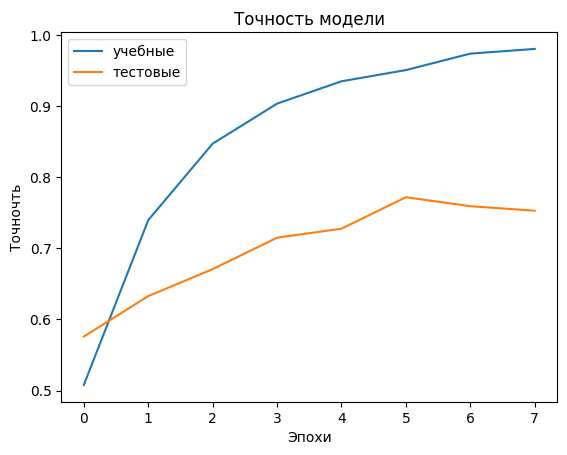

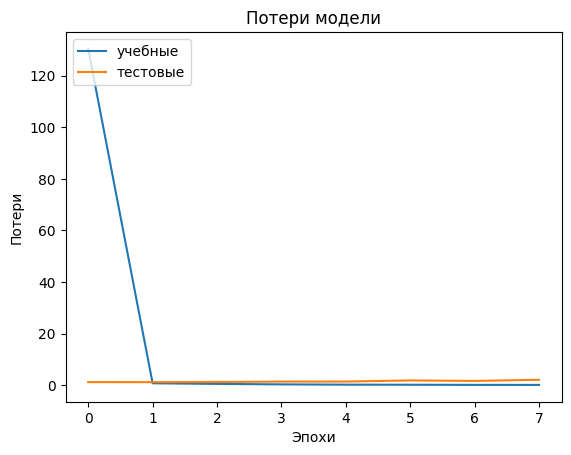

INFO:tensorflow:Assets written to: model_test.pt\assets


INFO:tensorflow:Assets written to: model_test.pt\assets


In [37]:
model = Sequential()
model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(x_train, y_train_encoded, validation_data= (x_test, y_test_encoded), epochs=8)
print(hist.history)
#модель сверточной нейронной сети

plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Точность модели")
plt.ylabel("Точночть")
plt.xlabel("Эпохи")
plt.legend(["учебные", "тестовые"], loc = "upper left")
plt.show()
#вывод графика точности модели

plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Потери модели")
plt.ylabel("Потери")
plt.xlabel("Эпохи")
plt.legend(["учебные", "тестовые"], loc = "upper left")
plt.show()
#вывод графика потери модели

model.save('model_test.pt')
model.save('model_test.h5')
#сохранение весов модели в форматах pt и h5

Теперь загрузим получившуюся обученную модель используя модуль библиотеки keras load_model

In [99]:
model = load_model('model_test.h5')
#загрузка модели

Проверим модель на тестовых данных:

In [100]:
output_neuronet = model.predict(x_test)

5/5 [==============================] - 1s 153ms/step


Выход нейросети по предсказаниям по тестовым данным необходимо сначала декодировать из бинарного скаляра, в который мы кодировали метки с помощью функции to_cathegorical, для этого была написана функция decode_output:

In [101]:
def decode_output(output):
    for index in range(len(output)):
        output[index] = np.argmax(output[index])
    output = output.tolist()
    new_massive = []
    for index in range(len(output)):
        new_massive.append(int(output[index][0]))
    return new_massive
#функция декодирования выхода нейросети

Применяем функцию, написанную выше для декодирования ответа нейросети:

In [102]:
output_neuronet = decode_output(output_neuronet)

Теперь подсчитаем количество совпавших предсказаний с метками и сравним с общим количеством тестовых данных:

In [103]:
count = 0
for index in range(len(y_test)):
    if output_neuronet[index] == y_test[index]:
        count += 1
        
print("Количество тестовых данных:", len(y_test))
print("Количество правильных предсказаний:", count)

Количество тестовых данных: 158
Количество правильных предсказаний: 119


Далее проверим каждый из классов изображений:

Предсказние: bad
Метка: bad


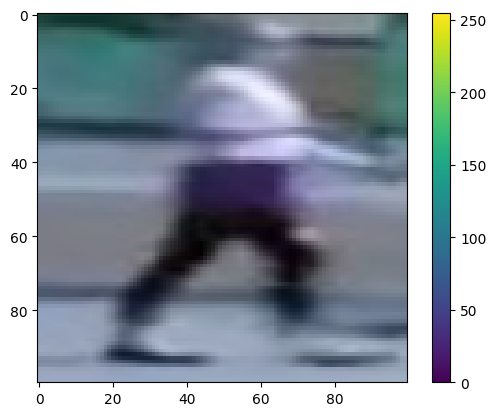

Предсказние: okay
Метка: okay


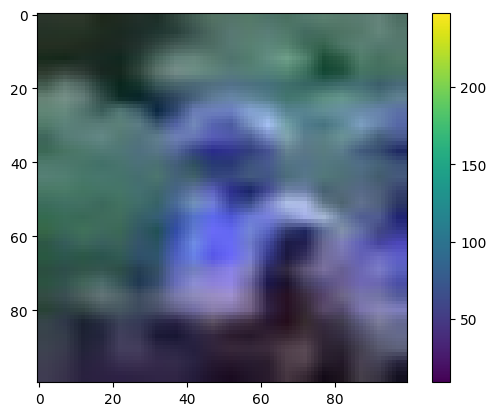

Предсказние: unknown
Метка: unknown


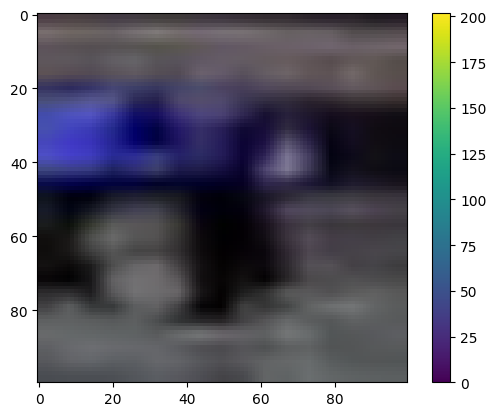

Предсказние: warning
Метка: warning


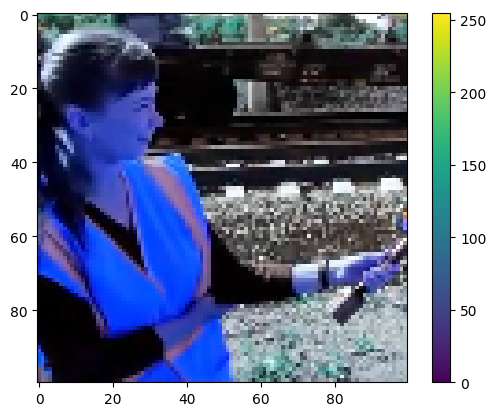

In [105]:
def check(mas, answer, y):
    new_answer = ''
    if answer == 1:
        new_answer ='bad'
    if answer == 2:
        new_answer ='okay'
    if answer == 3:
        new_answer ='unknown'
    if answer == 4:
        new_answer ='warning'
    y_new = ''
    if y == 1:
        y_new ='bad'
    if y == 2:
        y_new ='okay'
    if y == 3:
        y_new ='unknown'
    if y == 4:
        y_new ='warning'
        
    print("Предсказние:", new_answer)
    print("Метка:", y_new)
    plt.figure()
    plt.imshow(mas)
    plt.colorbar()
    plt.grid(False)
    plt.show()
        
check(x_test.tolist()[0], output_neuronet[0], y_test[0])
check(x_test.tolist()[4], output_neuronet[4], y_test[4])
check(x_test.tolist()[13], output_neuronet[13], y_test[13])
check(x_test.tolist()[14], output_neuronet[14], y_test[14])
    

# Выводы
119 из 158 - неплохой результат с учетом не лучшего качества входных данных и их небольшого количества, при увеличении количества данных или улучшении качества изображений и приведение их к более стандартизированному типу может в разы улучшить модель и распознавание

# Дополнительное задание №1
Необходимо построить матрицу истинности по всем классам и проверить на тестовых данных, тем самым, убедившись в точности модели

In [131]:
names_output_neuronet = ['b', 'o', 'u', 'w']
names_test = ['b', 
              'o', 
              'u', 
              'w']

mas = [[0 for index in range(4)] for index in range(4)]

for index in range(len(y_test)):
    line = y_test[index] - 1
    column = output_neuronet[index] - 1
    mas[line][column] += 1
    
print(names_output_neuronet)
for index in range(len(mas)):
    print(names_test[index], mas[index])

['b', 'o', 'u', 'w']
b [25, 3, 1, 6]
o [2, 36, 1, 1]
u [5, 4, 10, 4]
w [5, 7, 0, 48]


# Дополнительное задание №2
Проверить точность модели нейросети при различных входных данных(матриц 100 * 100, 110 на 110 и т.д) и построить график зафисимости финальной точности модели от размера входных данных

Epoch 1/8
38/38 [==============================] - 24s 604ms/step - loss: 107.8742 - accuracy: 0.5228 - val_loss: 1.2567 - val_accuracy: 0.5696
Epoch 2/8
38/38 [==============================] - 23s 600ms/step - loss: 0.7199 - accuracy: 0.7481 - val_loss: 1.0474 - val_accuracy: 0.6899
Epoch 3/8
38/38 [==============================] - 23s 612ms/step - loss: 0.4425 - accuracy: 0.8426 - val_loss: 0.9794 - val_accuracy: 0.6582
Epoch 4/8
38/38 [==============================] - 23s 605ms/step - loss: 0.2956 - accuracy: 0.9064 - val_loss: 1.4130 - val_accuracy: 0.6772
Epoch 5/8
38/38 [==============================] - 23s 601ms/step - loss: 0.1417 - accuracy: 0.9519 - val_loss: 1.1100 - val_accuracy: 0.7025
Epoch 6/8
38/38 [==============================] - 23s 603ms/step - loss: 0.1436 - accuracy: 0.9627 - val_loss: 1.4676 - val_accuracy: 0.7025
Epoch 7/8
38/38 [==============================] - 23s 605ms/step - loss: 0.0998 - accuracy: 0.9727 - val_loss: 1.6436 - val_accuracy: 0.6962
Epoc

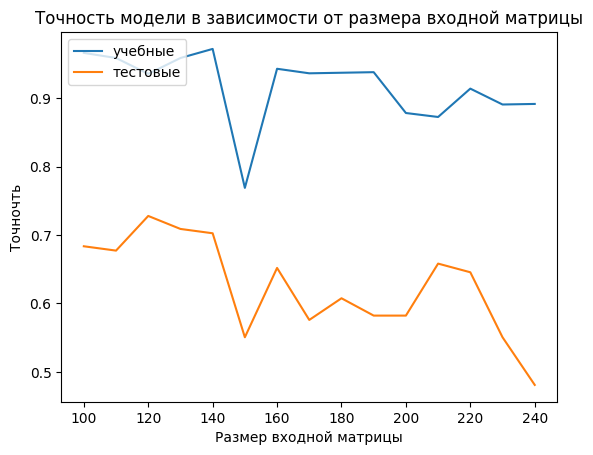

In [138]:
train_images_data = [images_train_bad, images_train_okay, images_train_unknown, images_train_warning]
test_images_data = [images_test_bad, images_test_okay, images_test_unknown, images_test_warning]
train_paths = ['train/bad', 'train/okey', 'train/unknow', 'train/warning']
test_paths = ['test/bad', 'test/okey', 'test/unknow', 'test/warning']
accuracy_massive = []
val_accuracy_massive = []
shapes_of_data = []
shape_in_moment = 100

for index in range(15):
    train_data = resize_and_add_marks_and_matrix(train_images_data, train_paths, shape_in_moment, shape_in_moment)
    test_data = resize_and_add_marks_and_matrix(test_images_data, test_paths, shape_in_moment, shape_in_moment)
    train_data = sorted(train_data, key=lambda A: rd.random())
    test_data = sorted(test_data, key=lambda A: rd.random())
    x_train = [train_data[index][0] for index in range(len(train_data))]
    y_train = [train_data[index][1] for index in range(len(train_data))]
    x_test = [test_data[index][0] for index in range(len(test_data))]
    y_test = [test_data[index][1] for index in range(len(test_data))]
    y_train_encoded = to_categorical(y_train)
    y_test_encoded = to_categorical(y_test)
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    model = Sequential()
    model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(shape_in_moment, shape_in_moment, 3)))
    model.add(MaxPooling2D())
    model.add(Conv2D(256, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(5, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    hist = model.fit(x_train, y_train_encoded, validation_data= (x_test, y_test_encoded), epochs=8)
    accuracy_in_moment = hist.history["accuracy"]
    val_accuracy_in_moment = hist.history["val_accuracy"]
    accuracy_massive.append(accuracy_in_moment[len(accuracy_in_moment) - 1])
    val_accuracy_massive.append(val_accuracy_in_moment[len(val_accuracy_in_moment) - 1])
    shapes_of_data.append(shape_in_moment)
    shape_in_moment += 10
    
plt.plot(shapes_of_data, accuracy_massive)
plt.plot(shapes_of_data, val_accuracy_massive)
plt.title("Точность модели в зависимости от размера входной матрицы")
plt.ylabel("Точночть")
plt.xlabel("Размер входной матрицы")
plt.legend(["учебные", "тестовые"], loc = "upper left")
plt.show()
